In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
import numpy as np

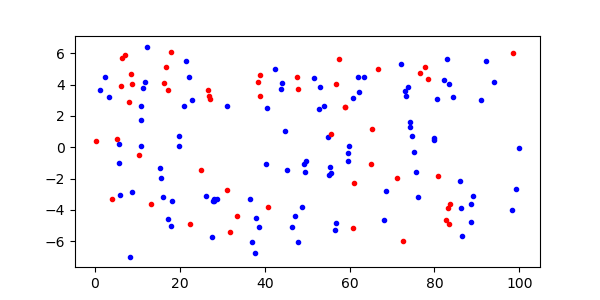

In [27]:
t1 = np.sort(np.random.rand(100))*100
m1 = 5*np.sin(2.0*np.pi*t1/10) + np.random.randn(len(t1))

t2 = np.sort(np.random.rand(50))*100
m2 = 5*np.sin(2.0*np.pi*t2/10 + 2.0*np.pi*5/10) + np.random.randn(len(t2))


fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(t1, m1, 'b.')
ax.plot(t2, m2, 'r.')

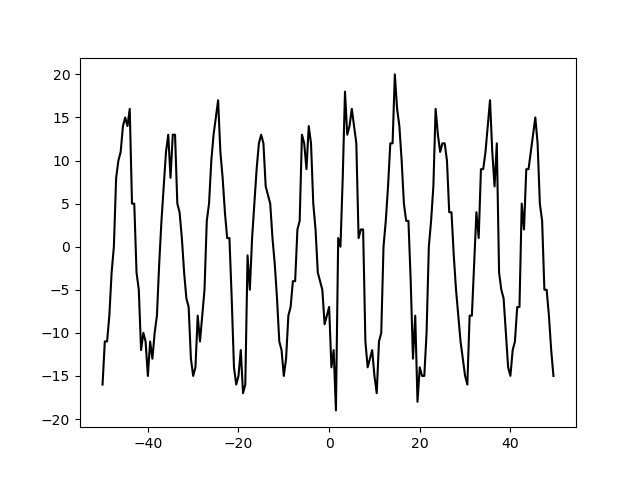

In [33]:
delta_tau = 0.5
dt = (t1.reshape(-1, 1) - t2.reshape(1, -1)).ravel()
dx = (m1.reshape(-1, 1)*m2.reshape(1, -1)).ravel()

k = np.arange(-100, 100)
c = np.zeros_like(k)
for k_ in k:
    
    #window = np.exp(-0.5*(dt - delta_tau*k_)**2/delta_tau**2)
    mask = np.abs(dt - delta_tau*k_) < 0.5*delta_tau
    if sum(mask) > 0:
        c[k_] = np.sum(dx[mask])/np.sum(mask)
        #c[k_] = np.sum(dx*window)/np.sum(window)
        
fig, ax = plt.subplots()
ax.plot(k*delta_tau, c, 'k-')